In [2]:
import numpy as np

import cv2



cap=cv2.VideoCapture(0)#getting to stated with vedios  to capture a vedio u need to create a vedio capture this will return a vedio from the first web cam on your computer

while True:#while condion is true this code initiate an infinate loop where we have ret and frame being defined as cap.read basically  ret is a boolean regarding whether or not the frame is return at all is 

    ret, img=cap.read()

    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)#here we define a new variable hsv as a frame

    kernel=np.ones((5,5),np.uint8)# returns a  new array of given shape and type ,filled with ones 

    Lower_green = np.array([29, 86, 6])#multi dimentional array

    Upper_green = np.array([64, 255, 255])

    mask=cv2.inRange(hsv,Lower_green,Upper_green)#once  u have definrd your upper and lower limits u then make a call to cv.inrange method which returns a mask, specing which pixel fall into your shecified upper and lower range

#mask = cv2.erode(mask, kernel, iterations=2)

    mask=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)

    #mask=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)

    mask = cv2.dilate(mask, kernel, iterations=1)

    res=cv2.bitwise_and(img,img,mask=mask)#2 image img1 and 2 contain alogo which we want to put on img1  

    cnts,heir=cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]# returns a modified img as a first of 3 return prameter here first arg is source img 2nd is counter retrival mode,3rd conter approx mathod and it outpus a modified image

    center = None #

 

    if len(cnts) > 0:#length of contors is > 0

        c = max(cnts, key=cv2.contourArea)#maximum of 

        ((x, y), radius) = cv2.minEnclosingCircle(c)

        M = cv2.moments(c)#gives a dictionary of all movement value calculated(center of mass of the obj , area of the object )

        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))# to extact useful data like area centroid etc where centroid is cx=m10/m00 and cy=m01/m00
 

        if radius > 10:

            cv2.circle(img, (int(x), int(y)), int(radius),(0, 255, 255), 2)# takes a tuple of two integer the first is width loc and 2nd is height loc

            cv2.circle(img, center, 5, (0, 0, 255), -1)






    cv2.imshow("Frame", img)#to display img in window the window automatically fits to img size

    cv2.imshow("mask",mask)

    cv2.imshow("res",res)



    k=cv2.waitKey(30) & 0xFF##is a keyboard binding fun its arg is time in mili sec

    if k==32:

        break
        # cleanup the camera and close any open windows

cap.release()# when eveything is done ,relese the capture

cv2.destroyAllWindows()#simply destroy all the windows we created

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# import libraries
import cv2
import face_recognition

# Get a reference to webcam 
video_capture = cv2.VideoCapture("face.xml")

# Initialize variables
face_locations = []

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)

    # Display the results
    for top, right, bottom, left in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ioi.jpg',cv2.IMREAD_COLOR)
face_csc = cv2.CascadeClassifier('face.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
faces = face_csc.detectMultiScale(gray, 1.1 , 4)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (12,150,100),2)# 12=R | 150= G | 100=B, 2=Thickness
cv2.imshow('image',img)
cv2.waitKey(0) # If you don'tput this line,thenthe image windowis just a flash. If you put any number other than 0, the same happens.
cv2.destroyAllWindows()

In [4]:
import numpy as np

import input_data

import cv2

import Digit_Recognizer_DL

import Digit_Recognizer_LR

import Digit_Recognizer_NN





def main():

    mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

    data = mnist.train.next_batch(8000)

    train_x = data[0]

    Y = data[1]

    train_y = (np.arange(np.max(Y) + 1) == Y[:, None]).astype(int)

    mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

    tb = mnist.train.next_batch(2000)

    Y_test = tb[1]

    X_test = tb[0]

    # 0.00002-92

    # 0.000005-92, 93 when 200000 190500
     d1 = Digit_Recognizer_LR.model(train_x.T, train_y.T, Y, X_test.T, Y_test, num_iters=1500, alpha=0.05,

                                   print_cost=True)

    w_LR = d1["w"]

    b_LR = d1["b"]



    d2 = Digit_Recognizer_NN.model_nn(train_x.T, train_y.T, Y, X_test.T, Y_test, n_h=100, num_iters=1500, alpha=0.05,

                                      print_cost=True)



    dims = [784, 100, 80, 50, 10]

    d3 = Digit_Recognizer_DL.model_DL(train_x.T, train_y.T, Y, X_test.T, Y_test, dims, alpha=0.5, num_iterations=1100,

                                      print_cost=True)



    cap = cv2.VideoCapture(0)



    while (cap.isOpened()):

        ret, img = cap.read()

        img, contours, thresh = get_img_contour_thresh(img)

        ans1 = ''

        ans2 = ''
         ans3 = ''

        if len(contours) > 0:

            contour = max(contours, key=cv2.contourArea)

            if cv2.contourArea(contour) > 2500:

                # print(predict(w_from_model,b_from_model,contour))

                x, y, w, h = cv2.boundingRect(contour)

                # newImage = thresh[y - 15:y + h + 15, x - 15:x + w +15]

                newImage = thresh[y:y + h, x:x + w]

                newImage = cv2.resize(newImage, (28, 28))

                newImage = np.array(newImage)

                newImage = newImage.flatten()

                newImage = newImage.reshape(newImage.shape[0], 1)

                ans1 = Digit_Recognizer_LR.predict(w_LR, b_LR, newImage)

                ans2 = Digit_Recognizer_NN.predict_nn(d2, newImage)

                ans3 = Digit_Recognizer_DL.predict(d3, newImage)

 x, y, w, h = 0, 0, 300, 300

        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.putText(img, "Logistic Regression : " + str(ans1), (10, 320),

                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.putText(img, "Shallow Network :  " + str(ans2), (10, 350),

                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.putText(img, "Deep Network :  " + str(ans3), (10, 380),

                    
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.imshow("Frame", img)

        cv2.imshow("Contours", thresh)

        k = cv2.waitKey(10)

        if k == 27:

            break





def get_img_contour_thresh(img):

    x, y, w, h = 0, 0, 300, 300
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (35, 35), 0)

    ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    thresh1 = thresh1[y:y + h, x:x + w]

    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]

    return img, contours, thresh1





main()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 107)

In [1]:
'''

car:

Car() - thread

run() - get current location and share this location with all other cars

'''

from threading import Thread



class Car(Thread):



    def __init__(self,Data_Set,conn_address):

        super().__init__()

        self.data_set = Data_Set

        self.data= conn_address

        self.conn = conn_address[0]

        self.address = conn_address[1]

        # Save connections and address

        self.save_conn_address()



In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ioi.jpg',cv2.IMREAD_COLOR)
face_csc = cv2.CascadeClassifier('face.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
faces = face_csc.detectMultiScale(gray, 1.1 , 4)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (12,150,100),2)# 12=R | 150= G | 100=B, 2=Thickness
cv2.imshow('image',img)
cv2.waitKey(0) # If you don'tput this line,thenthe image windowis just a flash. If you put any number other than 0, the same happens.
cv2.destroyAllWindows()

SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set

# 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer=load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data=scaler.transform(df)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=2)

In [15]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
x_pca=pca.transform(scaled_data)

In [17]:
scaled_data.shape

(569, 30)

In [19]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'second principle componenet')

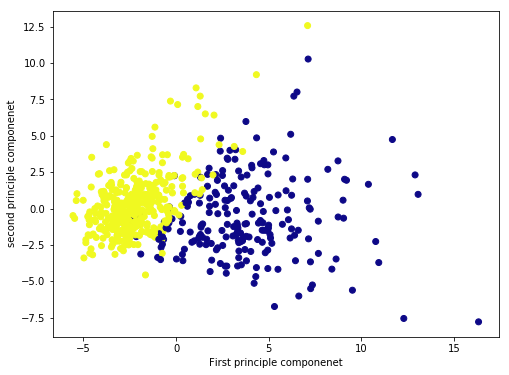

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principle componenet')
plt.ylabel('second principle componenet')



In [21]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [24]:
df_comp=pd.DataFrame(pca.components_,columns=cancer['feature_names'])

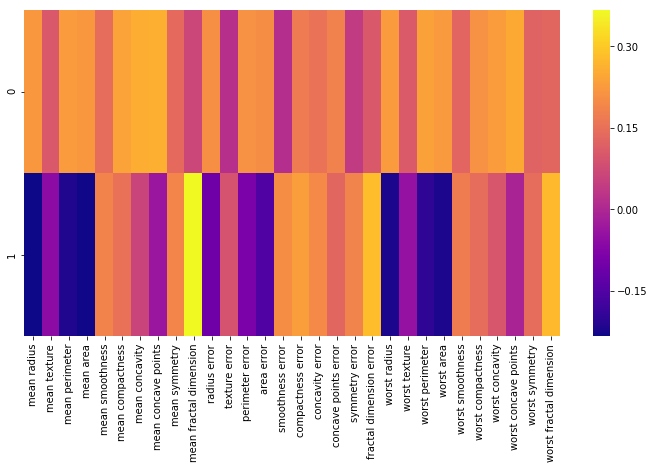

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)